In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import subprocess

# Univariate tests

In [2]:
# Generate data
rng = 20201124
np.random.seed(rng)
n = 200
norm1 = np.random.normal(loc=-4.0, scale=1.0, size=int(n/2))
norm2 = np.random.normal(loc=+4.0, scale=1.0, size=int(n/2))
data_uni = np.concatenate((norm1, norm2))
np.savetxt("../resources/csv/in/data_uni.csv", data_uni, fmt='%1.5f')

In [3]:
# Generate grid
grid_uni = np.arange(-10, +10, 0.1)
np.savetxt("../resources/csv/in/grid_uni.csv", grid_uni, fmt='%1.5f')

In [4]:
# True density of data
true_pdf = 0.5 * stats.norm.pdf(grid_uni, -4.0, 1.0) + \
           0.5 * stats.norm.pdf(grid_uni, +4.0, 1.0)

In [5]:
# Iterations to plot the density of
iters = [0, 10, 100, 500, 898]

## Fixed values hyperprior

In [6]:
# Run the executable
cmd = ["../build/run",
    "N8", str(rng), "5", "1000", "100",
    "NNIG", "../resources/asciipb/nnig_ngg_prior.asciipb",
    "DP", "../resources/asciipb/dp_gamma_prior.asciipb",
    "../resources/csv/in/data_uni.csv", "../resources/csv/in/grid_uni.csv",
    "../resources/csv/out/uf_dens.csv", "../resources/csv/out/uf_mass.csv",
    "../resources/csv/out/uf_nclu.csv", "../resources/csv/out/uf_clus.csv"
]
subprocess.run(cmd, capture_output=True)

CompletedProcess(args=['../build/run', 'N8', '20201124', '5', '1000', '100', 'NNIG', '../resources/asciipb/nnig_ngg_prior.asciipb', 'DP', '../resources/asciipb/dp_gamma_prior.asciipb', '../resources/csv/in/data_uni.csv', '../resources/csv/in/grid_uni.csv', '../resources/csv/out/uf_dens.csv', '../resources/csv/out/uf_mass.csv', '../resources/csv/out/uf_nclu.csv', '../resources/csv/out/uf_clus.csv'], returncode=0, stdout=b'Running run.cpp\nInitializing...\nRunning Neal8 algorithm (m=3 aux. blocks) with NNIG hierarchies, DP mixing...\nDone\nComputing log-density...\nDone\nSuccessfully wrote density to ../resources/csv/out/uf_dens.csv\nSuccessfully wrote total masses to ../resources/csv/out/uf_mass.csv\nSuccessfully wrote cluster sizes to ../resources/csv/out/uf_nclu.csv\nEnd of run.cpp\n', stderr=b'')

<ipython-input-7-df36333d092f>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


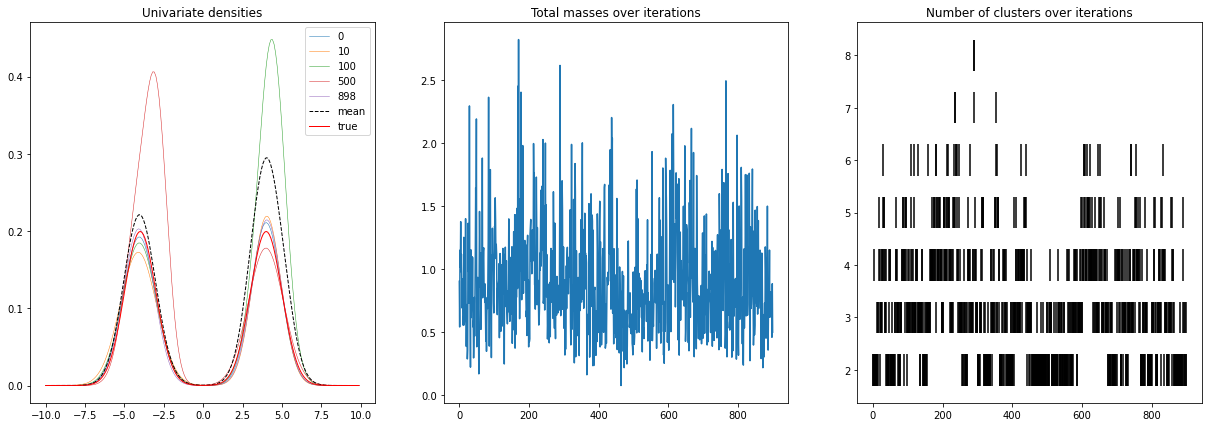

In [7]:
fig = plt.figure(figsize=(21,7))

# Densities
matr = np.genfromtxt("../resources/csv/out/uf_dens.csv", delimiter=',')
ax1 = fig.add_subplot(131)
for it in iters:
    ax1.plot(grid_uni, np.exp(matr[:,it]), linewidth=0.5)
ax1.plot(grid_uni, np.exp(np.mean(matr, axis=1)), linewidth=1.0,
         linestyle='--', color="black")

ax1.plot(grid_uni, true_pdf, linewidth=1.0, color="red")
ax1.legend(iters + ["mean", "true"])
ax1.set_title("Univariate densities")

# Total masses
masses = np.genfromtxt("../resources/csv/out/uf_mass.csv", delimiter='\n')
ax2 = fig.add_subplot(132)
ax2.plot(masses)
ax2.set_title("Total masses over iterations")

# Number of clusters
num_clust = np.genfromtxt("../resources/csv/out/uf_nclu.csv", delimiter='\n')
ax3 = fig.add_subplot(133)
ax3.vlines(np.arange(len(num_clust)), num_clust - 0.3, num_clust + 0.3)
ax3.set_title("Number of clusters over iterations")

fig.show()

## NGG hyperprior

In [12]:
# Run the executable
cmd = ["../build/run",
    "N2", str(rng), "0", "2000", "1000",
    "NNIG", "../resources/asciipb/nnig_ngg_prior.asciipb",
    "DP", "../resources/asciipb/dp_gamma_prior.asciipb",
    "../resources/csv/in/data_uni.csv", "../resources/csv/in/grid_uni.csv",
    "../resources/csv/out/un_dens.csv", "../resources/csv/out/un_mass.csv",
    "../resources/csv/out/un_nclu.csv", "../resources/csv/out/un_clus.csv"
]
subprocess.run(cmd, capture_output=True)

CompletedProcess(args=['../build/run', 'N2', '20201124', '0', '2000', '1000', 'NNIG', '../resources/asciipb/nnig_ngg_prior.asciipb', 'DP', '../resources/asciipb/dp_gamma_prior.asciipb', '../resources/csv/in/data_uni.csv', '../resources/csv/in/grid_uni.csv', '../resources/csv/out/un_dens.csv', '../resources/csv/out/un_mass.csv', '../resources/csv/out/un_nclu.csv', '../resources/csv/out/un_clus.csv'], returncode=0, stdout=b'Running run.cpp\nInitializing...\nRunning Neal2 algorithm with NNIG hierarchies, DP mixing...\nDone\nComputing log-density...\nDone\nSuccessfully wrote density to ../resources/csv/out/un_dens.csv\nSuccessfully wrote total masses to ../resources/csv/out/un_mass.csv\nSuccessfully wrote cluster sizes to ../resources/csv/out/un_nclu.csv\nEnd of run.cpp\n', stderr=b'')

<ipython-input-13-ecdb8dad7bec>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


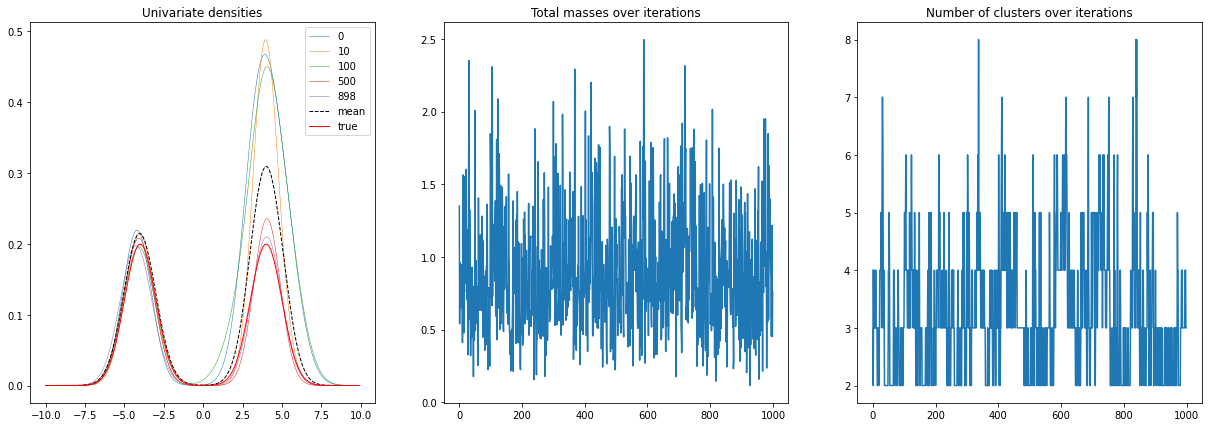

In [13]:
fig = plt.figure(figsize=(21,7))

# Densities
matr = np.genfromtxt("../resources/csv/out/un_dens.csv", delimiter=',')
ax1 = fig.add_subplot(131)
for it in iters:
    ax1.plot(grid_uni, np.exp(matr[:,it]), linewidth=0.5)
ax1.plot(grid_uni, np.exp(np.mean(matr, axis=1)), linewidth=1.0,
         linestyle='--', color="black")

ax1.plot(grid_uni, true_pdf, linewidth=1.0, color="red")
ax1.legend(iters + ["mean", "true"])
ax1.set_title("Univariate densities")

# Total masses
masses = np.genfromtxt("../resources/csv/out/un_mass.csv", delimiter='\n')
ax2 = fig.add_subplot(132)
ax2.plot(masses)
ax2.set_title("Total masses over iterations")

# Number of clusters
num_clust = np.genfromtxt("../resources/csv/out/un_nclu.csv", delimiter='\n')
ax3 = fig.add_subplot(133)
ax3.plot(num_clust)
ax3.set_title("Number of clusters over iterations")

fig.show()

# Multivariate tests

In [10]:
# Generate data
rng = 20201124
np.random.seed(rng)
n = 60
data_multi = np.zeros((n,2))
n2 = size=int(n/2)
data_multi[0:n2,0] = np.random.normal(loc=-3.0, scale=1.0, size=n2)
data_multi[0:n2,1] = np.random.normal(loc=-2.0, scale=1.0, size=n2)
data_multi[n2:n,0] = np.random.normal(loc=+3.0, scale=1.0, size=n2)
data_multi[n2:n,1] = np.random.normal(loc=+2.0, scale=1.0, size=n2)
np.savetxt("../resources/csv/in/data_multi.csv", data_multi, fmt='%1.5f')

In [11]:
# Generate grid
xx = np.arange(-7.0, +7.1, 0.5)
yy = np.arange(-6.0, +5.1, 0.5)
grid_multi = np.array(np.meshgrid(xx, yy)).T.reshape(-1, 2)
np.savetxt("../resources/csv/in/grid_multi.csv", grid_multi, fmt='%1.5f')

## Fixed values hyperprior

In [12]:
# Run the executable
cmd = ["../build/run",
    "N8", str(rng), "0", "1000", "100",
    "NNW", "../resources/asciipb/nnw_fixed_prior.asciipb",
    "DP", "../resources/asciipb/dp_gamma_prior.asciipb",
    "../resources/csv/in/data_multi.csv", "../resources/csv/in/grid_multi.csv",
    "../resources/csv/out/mf_dens.csv", "../resources/csv/out/mf_mass.csv",
    "../resources/csv/out/mf_nclu.csv", "../resources/csv/out/mf_clus.csv"
]
subprocess.run(cmd, capture_output=True)

CompletedProcess(args=['../build/run', 'N8', '20201124', '0', '1000', '100', 'NNW', '../resources/asciipb/nnw_fixed_prior.asciipb', 'DP', '../resources/asciipb/dp_gamma_prior.asciipb', '../resources/csv/in/data_multi.csv', '../resources/csv/in/grid_multi.csv', '../resources/csv/out/mf_dens.csv', '../resources/csv/out/mf_mass.csv', '../resources/csv/out/mf_nclu.csv', '../resources/csv/out/mf_clus.csv'], returncode=-6, stdout=b'Running run.cpp\n', stderr=b"terminate called after throwing an instance of 'std::invalid_argument'\n  what():  Error: unrecognized prior\n")

In [ ]:
fig = plt.figure(figsize=(21,7))

# Density
matr = np.genfromtxt("../resources/csv/out/mf_dens.csv", delimiter=',')
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(grid_multi[:,0], grid_multi[:,1], np.exp(np.mean(matr, axis=1)))
ax1.set_title("Mean multivariate density")

# Total masses
masses = np.genfromtxt("../resources/csv/out/mf_mass.csv", delimiter='\n')
ax2 = fig.add_subplot(132)
ax2.plot(masses)
ax2.set_title("Total masses over iterations")

# Number of clusters
num_clust = np.genfromtxt("../resources/csv/out/mf_nclu.csv", delimiter='\n')
ax3 = fig.add_subplot(133)
ax3.plot(num_clust)
ax3.set_title("Number of clusters over iterations")

fig.show()

## NGIW hyperprior

In [14]:
# Run the executable
cmd = ["../build/run",
    "N8", str(rng), "0", "1000", "100",
    "NNW", "../resources/asciipb/nnw_ngiw_prior.asciipb",
    "DP", "../resources/asciipb/dp_gamma_prior.asciipb",
    "../resources/csv/in/data_multi.csv", "../resources/csv/in/grid_multi.csv",
    "../resources/csv/out/mn_dens.csv", "../resources/csv/out/mn_mass.csv",
    "../resources/csv/out/mn_nclu.csv", "../resources/csv/out/mn_clus.csv"
]
subprocess.run(cmd, capture_output=True)

CompletedProcess(args=['../build/run', 'N8', '20201124', '0', '1000', '100', 'NNW', '../resources/asciipb/nnw_ngiw_prior.asciipb', 'DP', '../resources/asciipb/dp_gamma_prior.asciipb', '../resources/csv/in/data_multi.csv', '../resources/csv/in/grid_multi.csv', '../resources/csv/out/mn_dens.csv', '../resources/csv/out/mn_mass.csv', '../resources/csv/out/mn_nclu.csv', '../resources/csv/out/mn_clus.csv'], returncode=0, stdout=b'Running run.cpp\nInitializing...\nRunning Neal8 algorithm (m=3 aux. blocks) with NNW hierarchies, DP mixing...\nDone\nComputing log-density...\nDone\nSuccessfully wrote density to ../resources/csv/out/mn_dens.csv\nSuccessfully wrote total masses to ../resources/csv/out/mn_mass.csv\nSuccessfully wrote cluster sizes to ../resources/csv/out/mn_nclu.csv\nEnd of run.cpp\n', stderr=b'')

<ipython-input-15-ff40e9ac35a8>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


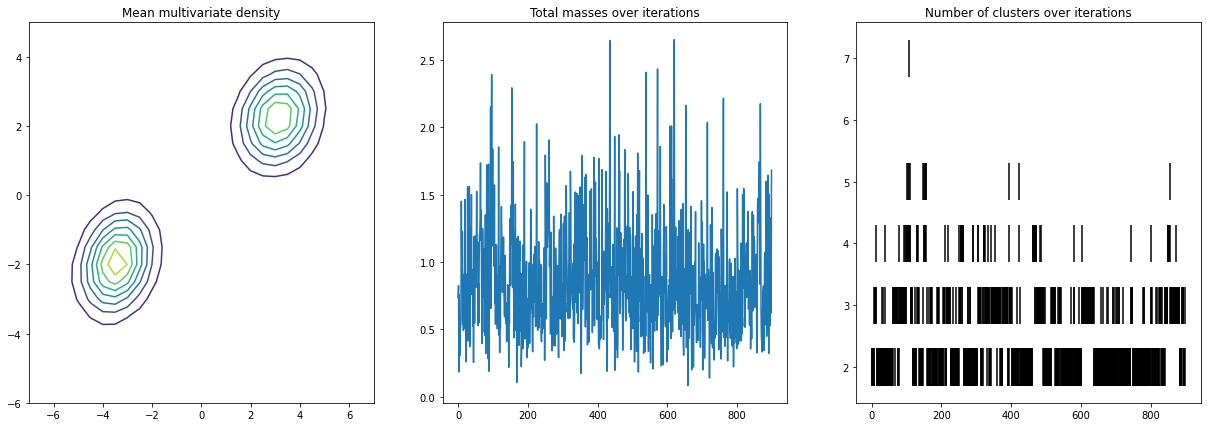

In [15]:
fig = plt.figure(figsize=(21,7))

# Density
matr = np.genfromtxt("../resources/csv/out/mn_dens.csv", delimiter=',')
mean_dens = np.exp(np.mean(matr, axis=1)).reshape(-1, 1)
plot_data = pd.DataFrame(np.hstack([grid_multi, mean_dens]), 
                         columns=["x", "y", "z"])
Z = plot_data.pivot_table(index='x', columns='y', values='z').T.values
X_unique = np.sort(plot_data.x.unique())
Y_unique = np.sort(plot_data.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
ax1 = fig.add_subplot(131) #, projection='3d')
ax1.contour(X, Y, Z)
ax1.set_title("Mean multivariate density")

# Total masses
masses = np.genfromtxt("../resources/csv/out/mn_mass.csv", delimiter='\n')
ax2 = fig.add_subplot(132)
ax2.plot(masses)
ax2.set_title("Total masses over iterations")

# Number of clusters
num_clust = np.genfromtxt("../resources/csv/out/mn_nclu.csv", delimiter='\n')
ax3 = fig.add_subplot(133)
ax3.vlines(np.arange(len(num_clust)), num_clust - 0.3, num_clust + 0.3)
ax3.set_title("Number of clusters over iterations")

fig.show()